In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("binary_classification.csv")
data

,X1,X2,y
0,0.345211,0.679774,1
1,0.191130,0.551668,0
2,0.358081,0.012984,1
3,0.393526,0.994465,0
4,0.387360,0.941051,0
...,...,...,...
995,0.462515,0.362538,1
996,0.088491,0.991026,0
997,0.406597,0.445482,1
998,0.720629,0.936527,1


In [3]:
X = data.iloc[:, :2].values
Y = data.y.values
matrix=np.hstack((np.ones((X.shape[0], 1)), X))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(matrix, Y, test_size=0.2, random_state=42)

In [5]:
def sigma(x,theta,theta1,theta2):
    return 1/(1 + np.exp(-x.dot(np.array([theta,theta1,theta2]))))
    
def Q(x,y,theta,theta1,theta2): 
    return -np.sum((y*np.log(sigma(x,theta,theta1,theta2))+(1-y)*np.log(1-sigma(x,theta,theta1,theta2))))/y.size

In [6]:
def Q_diff_theta(x, y,function,theta,theta1,theta2,eps):#функции для поиска частных производных в точке
    return (function(x,y,theta+eps,theta1,theta2)-function(x,y,theta,theta1,theta2))/eps

def Q_diff_theta1(x, y,function,theta,theta1,theta2,eps):#функции для поиска частных производных в точке
    return (function(x,y,theta,theta1+eps,theta2)-function(x,y,theta,theta1,theta2))/eps

def Q_diff_theta2(x, y,function,theta,theta1,theta2,eps):#функции для поиска частных производных в точке
    return (function(x,y,theta,theta1,theta2+eps)-function(x,y,theta,theta1,theta2))/eps


In [7]:
def gradient_descent(x,y,theta0,theta1_0,theta2_0,eps,nu,maxstep): # градиентный спуск
    theta = theta0
    theta1 = theta1_0
    theta2 = theta2_0
    i=0
    list_of_Q=[]
    while i<maxstep:
        i=i+1
        theta0, theta1_0, theta2_0 = theta, theta1, theta2
        theta = theta - nu * Q_diff_theta(x, y,Q,theta0, theta1_0, theta2_0,eps)
        theta1 = theta1 - nu * Q_diff_theta1(x, y,Q,theta0, theta1_0, theta2_0,eps)
        theta2 = theta2 - nu * Q_diff_theta2(x, y,Q,theta0, theta1_0, theta2_0,eps)
           
        list_of_Q.append(Q(x,y,theta,theta1,theta2))
    
        if (abs(theta - theta0) + abs(theta1 - theta1_0)+abs(theta2 - theta2_0) < eps): #критерий остановки
                return theta,theta1,theta2,list_of_Q
    return theta,theta1,theta2,list_of_Q


In [8]:
#начальные данные
theta0=0
theta1_0=0
theta2_0=0
maxstep=1000
nu=0.1
eps=10**-5
bachi=100

In [9]:
result=gradient_descent(X_train, Y_train,theta0, theta1_0,theta2_0, eps,nu,maxstep)
theta=result[0]
theta1=result[1]
theta2=result[2]
print(theta,theta1,theta2)

0.2914450173285843 4.341035074997834 -2.033761151326585


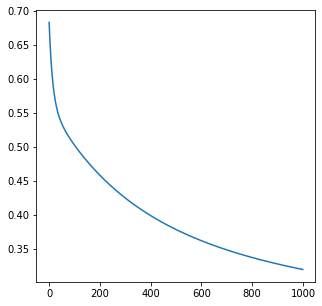

In [10]:
plt.figure(figsize=(5, 5))
plt.plot(result[3])
plt.show()

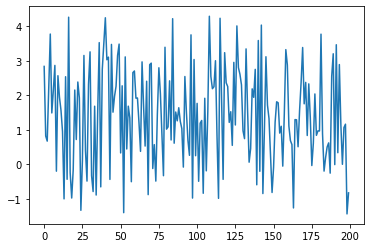

In [11]:
plt.plot(X_test.dot(np.array([theta,theta1,theta2])))

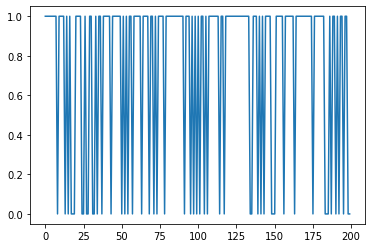

In [12]:
plt.plot(np.where(X_test.dot(np.array([theta,theta1,theta2])) >= 0.5, 1, 0))

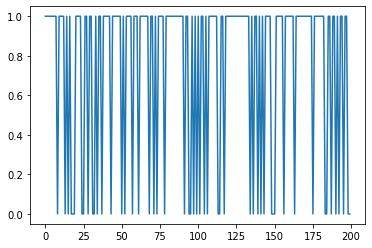

In [13]:
plt.plot(Y_test)